# Import

In [1]:
# Basic
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from robusta.selector import *
from robusta.crossval import *
from robusta.pipeline import *
from robusta.preprocessing import *

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import *

# Model
from sklearn.linear_model import Ridge

# Plot
from jupyterthemes import jtplot
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

Using TensorFlow backend.


# Data

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=20, n_informative=5, 
                       random_state=666)

X = pd.DataFrame(X)
y = pd.Series(y)

X.rename(columns=lambda x: 'x{}'.format(x), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
y

0      26.101745
1     -42.616486
2     -46.321013
3     100.987270
4      29.119044
         ...    
95    215.936404
96    272.505488
97     -9.940659
98    127.823394
99     48.658169
Length: 100, dtype: float64

# Task & Model

In [4]:
get_score = lambda y_true, y_pred: -mean_squared_error(y_true, y_pred)
scoring = 'neg_mean_squared_error'

#cv = 5
cv = 2

model = Ridge()

# Baseline

In [5]:
features = X_train.columns

_, y_pred = crossval_predict(model, cv, X_train[features], y_train, X_new=X_test[features],
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[15:57:45]  Ridge

[15:57:45]  FOLD  0:   -40.8234
[15:57:45]  FOLD  1:   -129.1511

[15:57:45]  AVERAGE:   -84.9872 ± 44.1638



-30.08859922513521

# Selector

## Greed Selector

In [15]:
selector = GreedSelector(model, cv, scoring, n_jobs=-1, 
                         floating=True, forward=True)
selector.fit(X_train, y_train)

features = selector.get_features()

[15:59:11] STEP FORWARD
[15:59:11] ITER: 1      SUBSET: 1/20      SCORE: -17130.7036 ± 97.7289
[15:59:11] ITER: 2      SUBSET: 1/20      SCORE: -16861.4463 ± 62.2755
[15:59:11] ITER: 3      SUBSET: 1/20      SCORE: -17045.2581 ± 103.9200
[15:59:11] ITER: 4      SUBSET: 1/20      SCORE: -18823.9059 ± 551.1147
[15:59:11] ITER: 5      SUBSET: 1/20      SCORE: -16841.2863 ± 8.8493
[15:59:12] ITER: 6      SUBSET: 1/20      SCORE: -16808.1636 ± 13.0608
[15:59:12] ITER: 7      SUBSET: 1/20      SCORE: -16880.5956 ± 83.7783
[15:59:12] ITER: 8      SUBSET: 1/20      SCORE: -12064.4517 ± 1522.9680
[15:59:12] ITER: 9      SUBSET: 1/20      SCORE: -17805.2765 ± 664.7695
[15:59:12] ITER: 10      SUBSET: 1/20      SCORE: -17266.1552 ± 521.1745
[15:59:12] ITER: 11      SUBSET: 1/20      SCORE: -17080.3382 ± 6.0110
[15:59:12] ITER: 12      SUBSET: 1/20      SCORE: -16777.9322 ± 757.1703
[15:59:12] ITER: 13      SUBSET: 1/20      SCORE: -15120.1259 ± 1925.0150
[15:59:13] ITER: 14      SUBSET: 1/20     

[15:59:25] ITER: 108      SUBSET: 6/20      SCORE: -20.4364 ± 4.4125
[15:59:25] ITER: 109      SUBSET: 6/20      SCORE: -22.9669 ± 6.8172
[15:59:25] ITER: 110      SUBSET: 6/20      SCORE: -21.3835 ± 3.9209
[15:59:25] ITER: 111      SUBSET: 6/20      SCORE: -19.8914 ± 4.4232
[15:59:25] STEP BACKWARD
[15:59:25] ITER: 112      SUBSET: 5/20      SCORE: -10323.1764 ± 528.1799
[15:59:26] ITER: 113      SUBSET: 5/20      SCORE: -2806.6772 ± 544.2345
[15:59:26] ITER: 114      SUBSET: 5/20      SCORE: -4645.0231 ± 358.4407
[15:59:26] ITER: 115      SUBSET: 5/20      SCORE: -4707.4306 ± 85.1981
[15:59:26] STEP FORWARD
[15:59:26] ITER: 116      SUBSET: 7/20      SCORE: -20.0230 ± 4.1794
[15:59:26] ITER: 117      SUBSET: 7/20      SCORE: -22.6888 ± 2.2706
[15:59:26] ITER: 118      SUBSET: 7/20      SCORE: -20.8347 ± 5.1217
[15:59:26] ITER: 119      SUBSET: 7/20      SCORE: -20.6976 ± 3.6034
[15:59:27] ITER: 120      SUBSET: 7/20      SCORE: -19.9209 ± 4.4309
[15:59:27] ITER: 121      SUBSET: 7/20

[15:59:40] ITER: 222      SUBSET: 10/20      SCORE: -24.9065 ± 1.9333
[15:59:40] ITER: 223      SUBSET: 10/20      SCORE: -21.0315 ± 4.9979
[15:59:40] ITER: 224      SUBSET: 10/20      SCORE: -21.7132 ± 3.4163
[15:59:40] ITER: 225      SUBSET: 10/20      SCORE: -20.9870 ± 4.8388
[15:59:40] ITER: 226      SUBSET: 10/20      SCORE: -23.8116 ± 7.1207
[15:59:40] ITER: 227      SUBSET: 10/20      SCORE: -22.4527 ± 4.4455


In [16]:
_, y_pred = crossval_predict(model, cv, X_train[features], y_train, 
                             X_new=X_test[features], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[15:59:40]  Ridge

[15:59:40]  FOLD  0:   -15.5932
[15:59:40]  FOLD  1:   -23.6035

[15:59:41]  AVERAGE:   -19.5984 ± 4.0051



-8.011058288705524

<IPython.core.display.Javascript object>


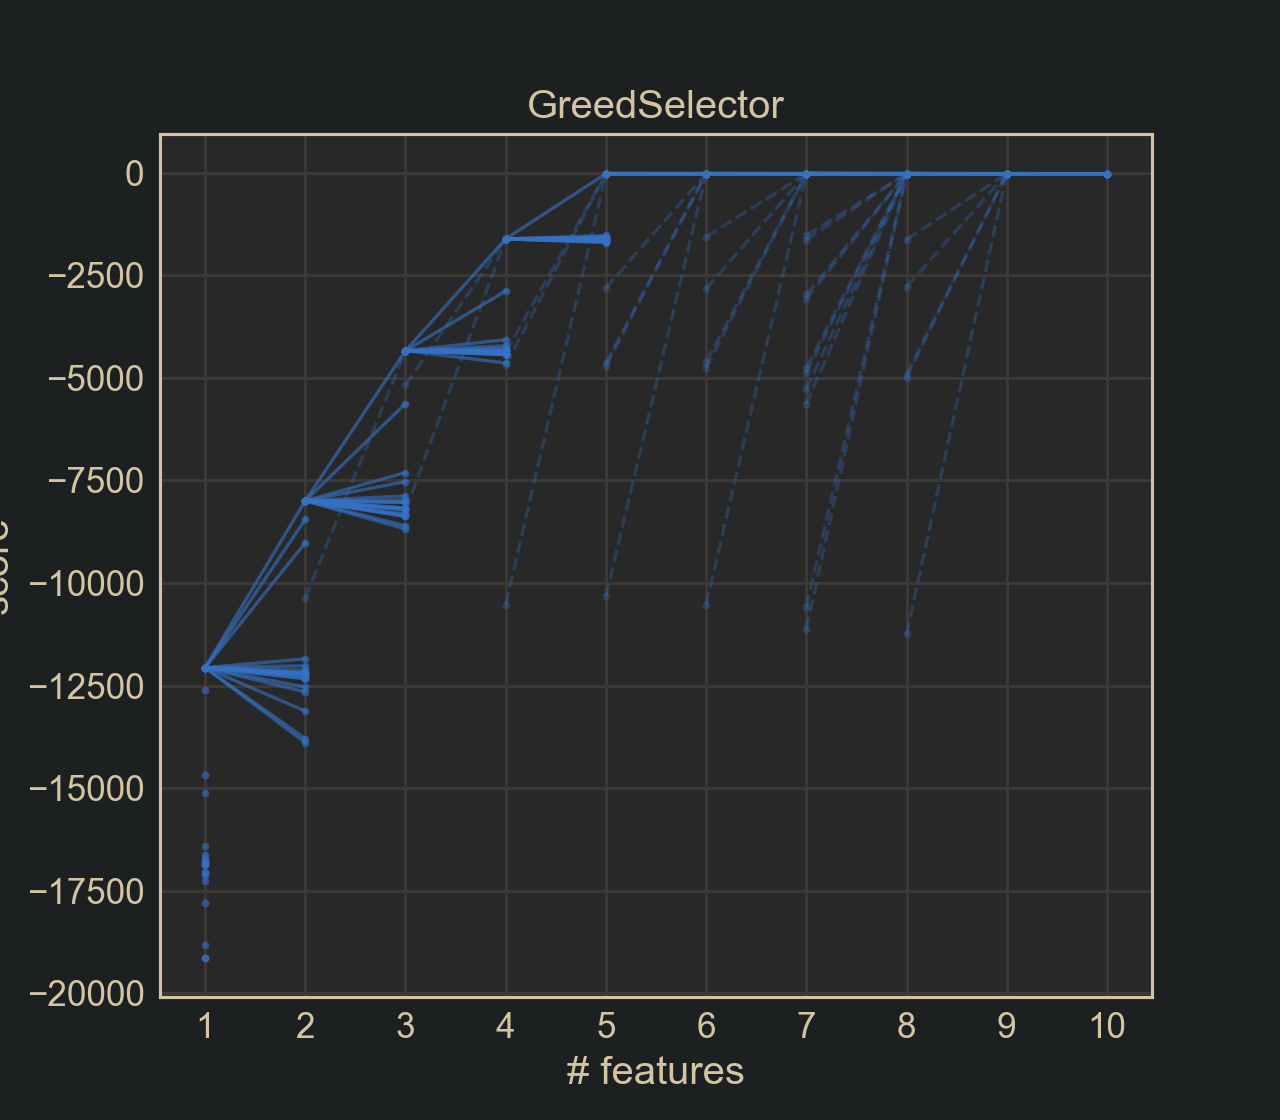

In [17]:
%matplotlib notebook

selector.plot(color='b')

## RFE

In [9]:
selector = RFE(model, cv, scoring, min_features=5, n_jobs=-1)
selector.fit(X_train, y_train)

features = selector.get_features()

[15:58:25] ITER: 1/16      SUBSET: 20/20      SCORE: -84.9872 ± 44.1638      ETA: 1 sec
[15:58:25] ITER: 2/16      SUBSET: 19/20      SCORE: -82.5163 ± 41.8001      ETA: 1 sec
[15:58:25] ITER: 3/16      SUBSET: 18/20      SCORE: -80.5939 ± 40.2342      ETA: 1 sec
[15:58:26] ITER: 4/16      SUBSET: 17/20      SCORE: -79.5484 ± 40.3744      ETA: 1 sec
[15:58:26] ITER: 5/16      SUBSET: 16/20      SCORE: -72.0471 ± 35.8151      ETA: 1 sec
[15:58:26] ITER: 6/16      SUBSET: 15/20      SCORE: -58.6183 ± 22.4012      ETA: 1 sec
[15:58:26] ITER: 7/16      SUBSET: 14/20      SCORE: -56.1694 ± 18.8731      ETA: 964 ms
[15:58:26] ITER: 8/16      SUBSET: 13/20      SCORE: -50.5469 ± 16.1165      ETA: 858 ms
[15:58:26] ITER: 9/16      SUBSET: 12/20      SCORE: -45.5069 ± 13.9536      ETA: 751 ms
[15:58:26] ITER: 10/16      SUBSET: 11/20      SCORE: -39.4101 ± 8.0139      ETA: 643 ms
[15:58:26] ITER: 11/16      SUBSET: 10/20      SCORE: -35.4035 ± 7.7831      ETA: 536 ms
[15:58:27] ITER: 12/16     

In [10]:
_, y_pred = crossval_predict(model, cv, X_train[features], y_train, 
                             X_new=X_test[features], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[15:58:27]  Ridge

[15:58:27]  FOLD  0:   -15.3997
[15:58:27]  FOLD  1:   -23.8559

[15:58:27]  AVERAGE:   -19.6278 ± 4.2281



-6.336880581255802

<IPython.core.display.Javascript object>


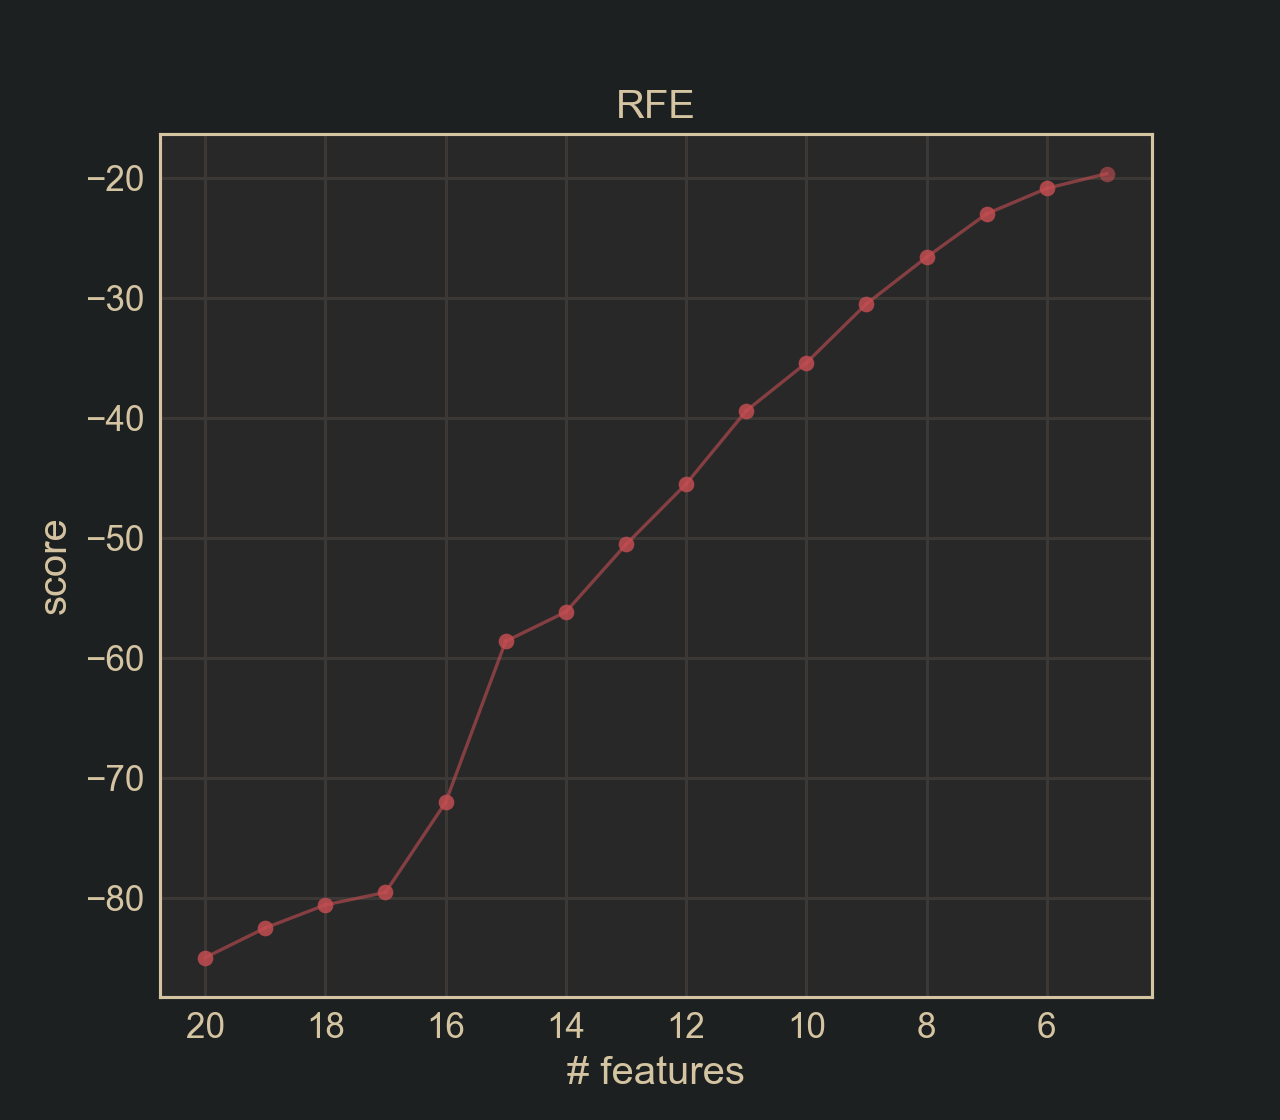

In [11]:
%matplotlib notebook

selector.plot(marker='o', color='r')

## Random Subset

In [12]:
selector = RandomSubset(model, cv, scoring, n_jobs=-1, max_iter=300, max_time=10)
selector.fit(X_train, y_train)

features = selector.get_features()

[15:58:32] ITER: 1/300      SUBSET: 14/20      SCORE: -4582.3962 ± 753.9533      ETA: 9 sec
[15:58:32] ITER: 2/300      SUBSET: 13/20      SCORE: -18790.9135 ± 1505.1360      ETA: 9 sec
[15:58:32] ITER: 3/300      SUBSET: 18/20      SCORE: -55.7190 ± 17.1334      ETA: 9 sec
[15:58:33] ITER: 4/300      SUBSET: 16/20      SCORE: -1862.6434 ± 111.7222      ETA: 9 sec
[15:58:33] ITER: 5/300      SUBSET: 15/20      SCORE: -45.3729 ± 16.8745      ETA: 9 sec
[15:58:33] ITER: 6/300      SUBSET: 18/20      SCORE: -72.2918 ± 35.2165      ETA: 9 sec
[15:58:33] ITER: 7/300      SUBSET: 11/20      SCORE: -13064.0577 ± 2629.7301      ETA: 9 sec
[15:58:33] ITER: 8/300      SUBSET: 14/20      SCORE: -45.2051 ± 12.4349      ETA: 9 sec
[15:58:33] ITER: 9/300      SUBSET: 14/20      SCORE: -36.2656 ± 3.9671      ETA: 9 sec
[15:58:33] ITER: 10/300      SUBSET: 14/20      SCORE: -15418.7347 ± 2448.0495      ETA: 8 sec
[15:58:34] ITER: 11/300      SUBSET: 13/20      SCORE: -11566.4104 ± 1564.7390      ETA: 

[15:58:43] ITER: 88/300      SUBSET: 16/20      SCORE: -11892.2649 ± 993.7455      ETA: 572 ms
[15:58:43] ITER: 89/300      SUBSET: 18/20      SCORE: -13392.4650 ± 3710.6563      ETA: 466 ms
[15:58:44] ITER: 90/300      SUBSET: 18/20      SCORE: -72.6388 ± 34.4406      ETA: 357 ms
[15:58:44] ITER: 91/300      SUBSET: 17/20      SCORE: -56.1815 ± 25.2836      ETA: 250 ms
[15:58:44] ITER: 92/300      SUBSET: 12/20      SCORE: -9559.5426 ± 369.2754      ETA: 143 ms
[15:58:44] ITER: 93/300      SUBSET: 12/20      SCORE: -6339.1207 ± 544.5217      ETA: 36 ms
[15:58:44] ITER: 94/300      SUBSET: 18/20      SCORE: -2238.0742 ± 462.5748      ETA: 0 ms
Time limit exceed!


In [13]:
_, y_pred = crossval_predict(model, cv, X_train[features], y_train, 
                             X_new=X_test[features], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[15:58:44]  Ridge

[15:58:44]  FOLD  0:   -22.8795
[15:58:44]  FOLD  1:   -34.8066

[15:58:44]  AVERAGE:   -28.8431 ± 5.9636



-13.570625976515746

<IPython.core.display.Javascript object>


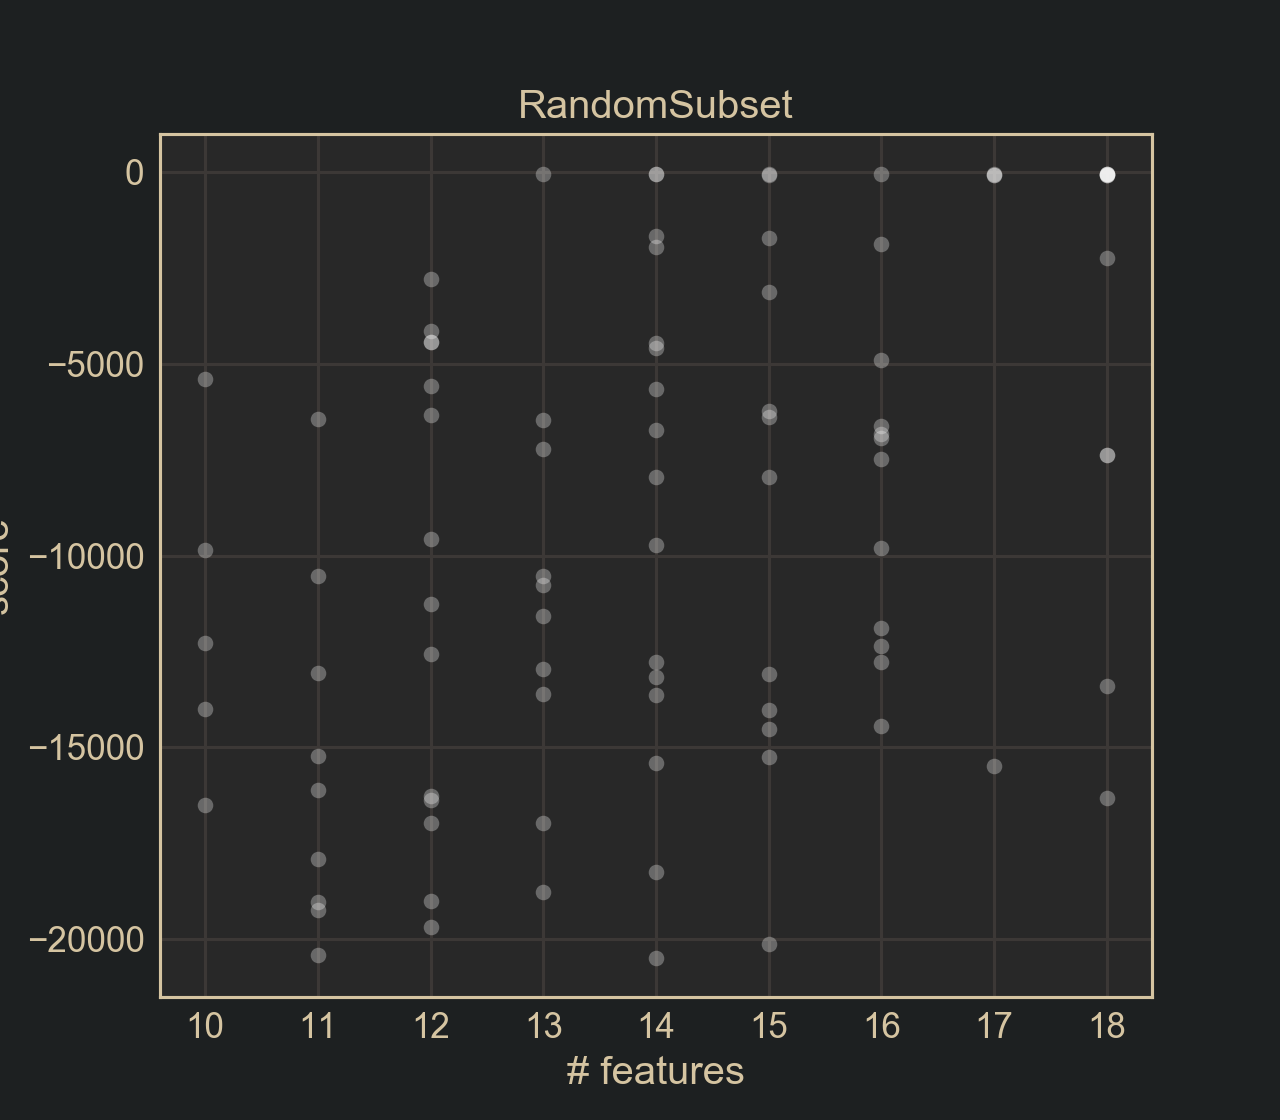

In [14]:
%matplotlib notebook

selector.plot(marker='o', alpha=0.3, color='w')